In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
df = pd.read_csv('squaremeal.csv')

In [3]:
df

,cuisine,name,num_reviews,price,stars
0,Modern European,Savoy Grill at The Savoy,40,64.5,3.5
1,Bars,Dirty Martini Covent Garden,2,N\A,3.0
2,Indian,Tamarind Mayfair,23,64.5,4.0
3,Bars,Bourne & Hollingsworth,1,N\A,5.0
4,French,Creme de la Crepe,0,N\A,5.0
...,...,...,...,...,...
1255,"North American, Steak",STK London,17,64.5,2.0
1256,"Japanese, Noodles",Shoryu Ramen Covent Garden,0,39.5,5.0
1257,Pubs,The Burlington Arms,0,30.0,5.0
1258,Modern European,Spring,16,64.5,3.5


In [4]:
df.sort_values('stars', ascending=False)

,cuisine,name,num_reviews,price,stars
630,Mexican,Kol,0,64.5,5.0
559,British,Papillon at Hotel Cafe Royal,0,N\A,5.0
976,"Burgers, International",Byron Haymarket,0,30.0,5.0
973,Bars,Ain't Nothin' But... The Blues Bar,0,N\A,5.0
972,British,Bar & Kitchen,0,N\A,5.0
...,...,...,...,...,...
347,Thai,Sawadika Fine Thai Restaurant,1,N\A,1.0
998,French,Café Rouge - Kingsway,1,N\A,1.0
450,"Ice Cream, International",My Old Dutch,1,30.0,0.5
39,Bars,Garlic & Shots,2,N\A,0.5


In [5]:
df = df.replace('N\A', np.nan)
np.sum(df.isnull())

cuisine         97
name             0
num_reviews      0
price          398
stars            0
dtype: int64

In [6]:
df_new = df.dropna()

In [7]:
np.sum(df_new.isnull())

cuisine        0
name           0
num_reviews    0
price          0
stars          0
dtype: int64

In [8]:
df_new.dtypes

cuisine         object
name            object
num_reviews      int64
price           object
stars          float64
dtype: object

In [10]:
df_new['price'] = pd.to_numeric(df_new['price'])
df.dtypes

/Users/ElinaMac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


cuisine         object
name            object
num_reviews      int64
price           object
stars          float64
dtype: object

In [12]:
#average price
avg_price = df_new['price'].mean()
avg_price

43.665617128463474

In [14]:
#average stars given 
avg_stars = df_new['stars'].mean()
avg_stars

4.383501259445844

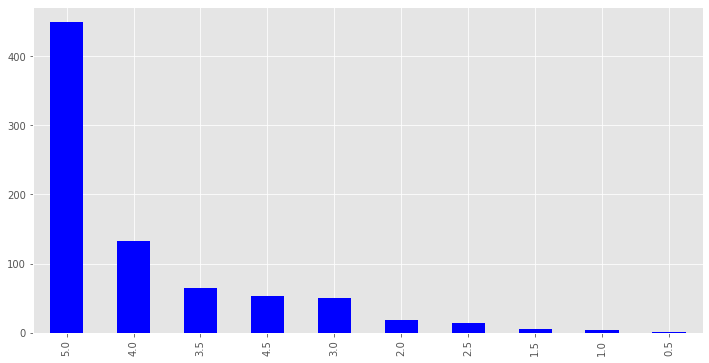

In [15]:
#number of restaurants with each rating
plt.figure(figsize=(12,6))
df_new['stars'].value_counts().plot.bar(color = 'b')

In [16]:
df_new.agg(['mean', 'min', 'max'])['price']

min     30.000000
max     80.000000
mean    43.665617
Name: price, dtype: float64

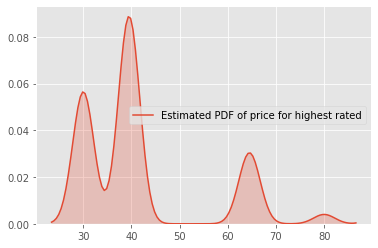

In [18]:
import seaborn as sns
df_5 = df_new[df_new['stars'] == 5.0]
sns.kdeplot(df_5['price'], shade  = True, label = 'Estimated PDF of price for highest rated')

In [19]:
#top 20 most expensive restaurants
df_new.sort_values('price', ascending = False).head(20)

,cuisine,name,num_reviews,price,stars
289,"Japanese, Sushi",Roka Charlotte Street,40,80.0,5.0
1147,"Fish, International, Steak",Beast,3,80.0,3.0
1049,British,Aulis London,1,80.0,5.0
247,"Afternoon tea, British, French, Modern European",Bustronome,56,80.0,5.0
466,British,Hide Above,6,80.0,2.5
487,Japanese,Hannah Japanese Restaurant,0,80.0,5.0
242,Italian,Ristorante Frescobaldi,4,80.0,4.0
1052,Italian,Murano,47,80.0,4.0
798,Bars,The American Bar at The Stafford,1,80.0,4.0
35,"Japanese, Sushi",Roka Aldwych,13,80.0,2.5


In [21]:
#top 20 highest rated restaurants
df_new.sort_values('stars', ascending = False).head(20)

,cuisine,name,num_reviews,price,stars
1101,Afternoon tea,Afternoon Tea at Dukes London,0,39.5,5.0
603,"Bars, British",Sway Bar,0,39.5,5.0
597,Indian,The Curry Room,0,64.5,5.0
595,Afternoon tea,The Athenaeum (afternoon tea),0,39.5,5.0
594,"Barbecue, North American",Bodean's Covent Garden,0,39.5,5.0
591,North American,Sweet Chick,0,39.5,5.0
1063,"Afternoon tea, Central European, Modern European",The Wolseley,70,64.5,5.0
589,Korean,Assa,0,39.5,5.0
588,Fish and Chips,Poppie's Fish & Chips Soho,0,30.0,5.0
1064,"Afternoon tea, British",Berners Tavern at The London Edition,41,64.5,5.0


In [22]:
#number of reviews given
df_new.agg(['min', 'max', 'mean', 'std'])['num_reviews']

min      0.000000
max     91.000000
mean     4.863980
std     10.085843
Name: num_reviews, dtype: float64

In [23]:
total_reviews = df_new.num_reviews.sum()
total_reviews

3862

In [24]:
overall_avg = sum(df_new.num_reviews * df_new.stars)/total_reviews
overall_avg

4.104867944070429

In [25]:
#calculate Bayesian adjusted ranking
df_new['stars_adj'] = (total_reviews*overall_avg + df_new.num_reviews * df_new.stars)/(total_reviews + df_new.num_reviews)

/Users/ElinaMac/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [27]:
#Top 20 highest rated according to Bayesian adjusted ranking (takes into account stars and number of reviews)
df_top20 = df_new.sort_values('stars_adj', ascending = False).head(20)
df_top20

,cuisine,name,num_reviews,price,stars,stars_adj
1099,"Afternoon tea, Austrian, Central European",The Delaunay,71,64.5,5.0,4.121027
1063,"Afternoon tea, Central European, Modern European",The Wolseley,70,64.5,5.0,4.120804
25,Italian,Bocca di Lupo,64,64.5,5.0,4.119460
1229,"British, International",The Ivy,56,64.5,5.0,4.117662
247,"Afternoon tea, British, French, Modern European",Bustronome,56,80.0,5.0,4.117662
491,"Chinese, Dim Sum",Yauatcha Soho,51,64.5,5.0,4.116535
1064,"Afternoon tea, British",Berners Tavern at The London Edition,41,64.5,5.0,4.114271
1254,"British, Steak",Hawksmoor Seven Dials,41,64.5,5.0,4.114271
289,"Japanese, Sushi",Roka Charlotte Street,40,80.0,5.0,4.114044
1084,British,Pollen Street Social,91,64.5,4.5,4.113964


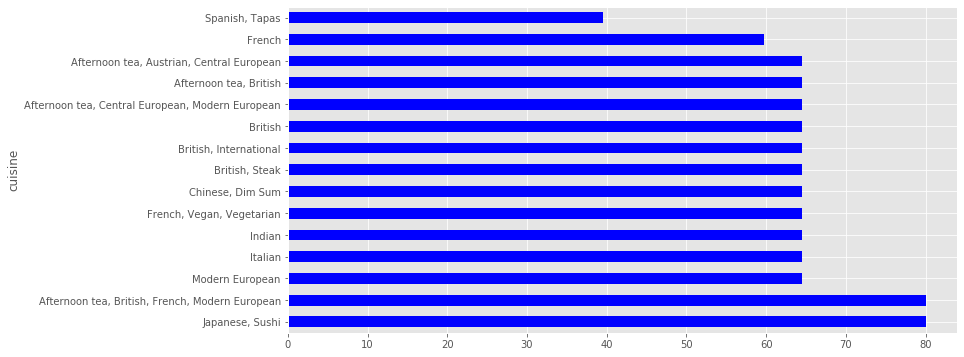

In [28]:
#average prices of top 20 highest rated by cuisine
plt.figure(figsize=(12,6))
df_top20.groupby('cuisine')['price'].mean().sort_values(ascending=False).plot(kind = 'barh',color = 'b')


<Figure size 864x432 with 0 Axes>

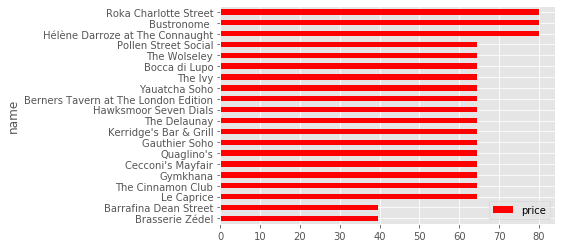

In [29]:
#prices of top 20 highest rated by nameavg_stars_adj = df_new['stars_adj'].mean()
plt.figure(figsize=(12,6))
df_top20.sort_values(ascending = True, by = 'price').plot(kind = 'barh', x = 'name', y = 'price', color = 'r')

In [30]:
avg_stars_adj = df_new['stars_adj'].mean()
avg_stars_adj

4.104865818212156

In [31]:
avg_price

43.665617128463474

In [32]:
#list of recommended restaurants based on combination of higher-than-average rating and lower-than average price
df_new.loc[(df_new['stars_adj'] > avg_stars_adj) & (df_new['price'] < avg_price)].sort_values('stars_adj', ascending = False).head(20)

,cuisine,name,num_reviews,price,stars,stars_adj
469,"Spanish, Tapas",Barrafina Dean Street,28,39.5,5.0,4.111311
1160,French,Brasserie Zédel,56,39.5,4.5,4.110516
366,"International, Middle Eastern",The Palomar,23,39.5,5.0,4.110167
363,Greek,The Elysée,20,39.5,5.0,4.109480
506,British,Frog by Adam Handling,12,39.5,5.0,4.107641
116,"Argentinian, Steak",The Bull Steak Expert,9,39.5,5.0,4.106949
157,Japanese,Sticks 'N' Sushi,9,39.5,5.0,4.106949
685,Modern European,Waterloo Bar & Kitchen,20,39.5,4.5,4.106904
1038,"British, Fish",Wright Brothers Soho,20,39.5,4.5,4.106904
488,Fish,J Sheekey Atlantic Bar,8,39.5,5.0,4.106718
